In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import random

# Ensuring results are reproducible by fixing seeds across libraries
def set_random_seeds(seed=42):
    """
    Sets the random seed for NumPy, TensorFlow, and Python's random module.
    """
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

set_random_seeds(42)

# Loading the IMDB dataset with the top 10,000 most frequent words
print("Loading IMDB dataset: ")
(raw_train_data, raw_train_targets), (raw_test_data, raw_test_targets) = imdb.load_data(num_words=10000)

# Converting the word index sequences into binary vectors (multi-hot representation)
def multi_hot_encode(sequences_list, vocab_limit=10000):
    """
    Transforms list of sequences into a binary multi-hot encoded NumPy array.
    """
    binary_matrix = np.zeros((len(sequences_list), vocab_limit))
    for i, word_indices in enumerate(sequences_list):
        binary_matrix[i, word_indices] = 1.0
    return binary_matrix

# Vectorize input reviews and preparing the target labels
train_vectors = multi_hot_encode(raw_train_data)
test_vectors = multi_hot_encode(raw_test_data)

train_targets = np.asarray(raw_train_targets).astype("float32")
test_targets = np.asarray(raw_test_targets).astype("float32")

# Separating a validation subset from the training data
validation_inputs = train_vectors[:10000]
partial_train_inputs = train_vectors[10000:]
validation_outputs = train_targets[:10000]
partial_train_outputs = train_targets[10000:]

# Building and compiling a feedforward neural network
def build_neural_model(num_hidden_layers=2, units_per_layer=16, activation_type='relu', dropout_rate=0.0, loss_type='binary_crossentropy'):
    """
    Builds and compiles a sequential neural network model.
    """
    model = keras.Sequential()
    model.add(layers.Dense(units_per_layer, activation=activation_type, input_shape=(10000,)))

    for _ in range(num_hidden_layers - 1):
        model.add(layers.Dense(units_per_layer, activation=activation_type))
        if dropout_rate > 0.0:
            model.add(layers.Dropout(dropout_rate))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss=loss_type,
                  metrics=['accuracy', 'precision', 'recall', 'auc'])
    return model

# Dictionary to keep track of outcomes from multiple experiments
evaluation_summary = {
    'Hidden Layers': {},
    'Neuron Count': {},
    'Loss Function': {},
    'Activation Function': {},
    'Dropout Rate': {}
}

# Function to visualize training/validation curves
def plot_metrics(metric_history, chart_title, metric_label):
    """
    Plots accuracy or loss over epochs for different experimental setups.
    """
    plt.figure(figsize=(10, 6))
    for setting, log in metric_history.items():
        epochs_range = range(1, len(log.history['accuracy']) + 1)
        plt.plot(epochs_range, log.history['accuracy'], label=f'Training {metric_label}')
        plt.plot(epochs_range, log.history['val_accuracy'], label=f'Validation {metric_label}')
    plt.title(chart_title)
    plt.xlabel('Epochs')
    plt.ylabel(metric_label)
    plt.legend()
    plt.show()


Loading IMDB dataset: 



--- Experiment 1: Number of Hidden Layers ---
Training model with 1 hidden layer(s)...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.7302 - auc: 0.8075 - loss: 0.5782 - precision: 0.7289 - recall: 0.7306 - val_accuracy: 0.8604 - val_auc: 0.9349 - val_loss: 0.4065 - val_precision: 0.8818 - val_recall: 0.8357
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8906 - auc: 0.9549 - loss: 0.3561 - precision: 0.8893 - recall: 0.8909 - val_accuracy: 0.8795 - val_auc: 0.9476 - val_loss: 0.3359 - val_precision: 0.8893 - val_recall: 0.8698
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9144 - auc: 0.9700 - loss: 0.2788 - precision: 0.9117 - recall: 0.9167 - val_accuracy: 0.8849 - val_auc: 0.9519 - val_loss: 0.3035 - val_precision: 0.8953 - val_recall: 0.8745
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9279 - auc: 0.9778 - loss: 0.2327 - precision: 0.9270 - recall: 0.9281 - val_accuracy: 0.8875 - val_auc: 0.9535 - val_loss: 

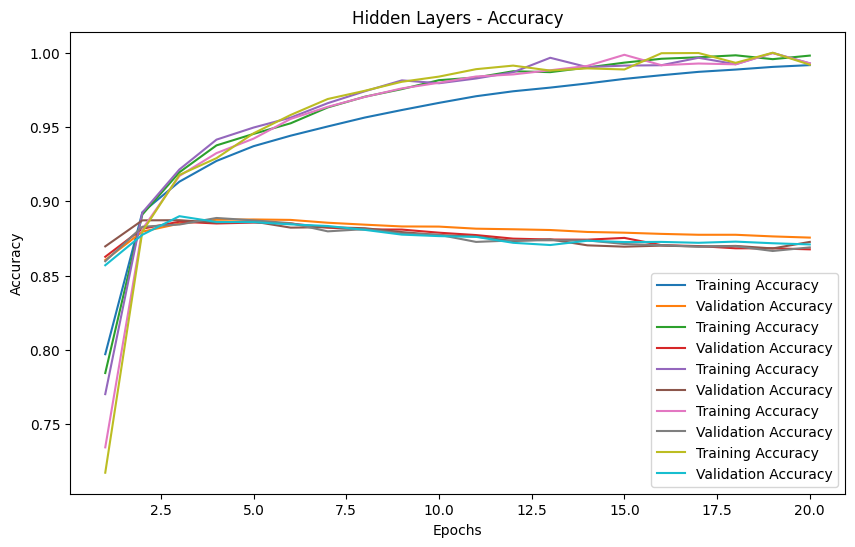

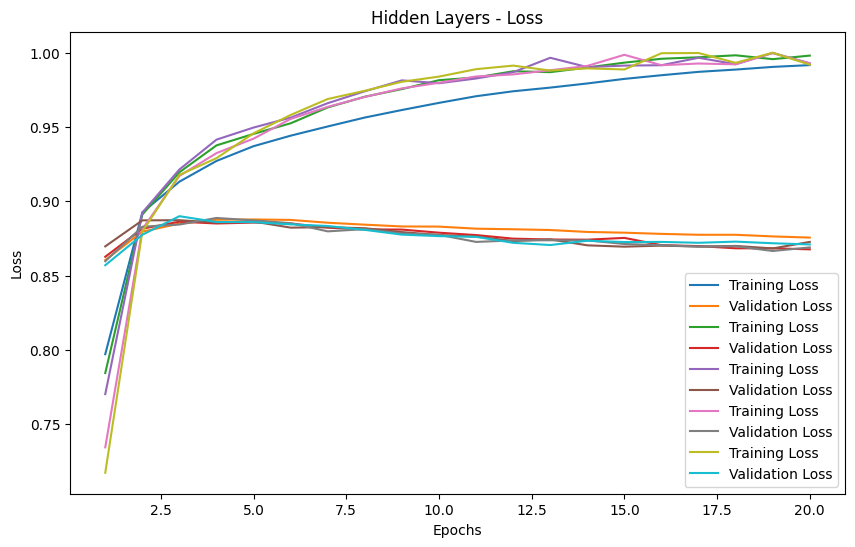

In [ ]:
# Experiment 1: Evaluating the impact of varying the number of hidden layers
print("\n--- Experiment 1: Number of Hidden Layers ---")
layer_variations = [1, 2, 3, 4, 5]
history_by_layer_count = {}

for layer_count in layer_variations:
    print(f"Training model with {layer_count} hidden layer(s)...")
    temp_model = build_neural_model(num_hidden_layers=layer_count, units_per_layer=16)
    training_log = temp_model.fit(partial_train_inputs, partial_train_outputs,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(validation_inputs, validation_outputs),
                                  verbose=1)
    history_by_layer_count[layer_count] = training_log
    final_val_accuracy = training_log.history['val_accuracy'][-1]
    final_test_accuracy = temp_model.evaluate(test_vectors, test_targets, verbose=0)[1]
    evaluation_summary['Hidden Layers'][layer_count] = {
        'Validation Accuracy': final_val_accuracy,
        'Test Accuracy': final_test_accuracy
    }

plot_metrics(history_by_layer_count, 'Hidden Layers - Accuracy', 'Accuracy')
plot_metrics(history_by_layer_count, 'Hidden Layers - Loss', 'Loss')



--- Experiment 2: Varying Neuron Count ---
Training model with 32 neurons per layer...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.7030 - auc: 0.7676 - loss: 0.5940 - precision: 0.6935 - recall: 0.7451 - val_accuracy: 0.8601 - val_auc: 0.9378 - val_loss: 0.3779 - val_precision: 0.8253 - val_recall: 0.9173
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8883 - auc: 0.9511 - loss: 0.3281 - precision: 0.8796 - recall: 0.8985 - val_accuracy: 0.8784 - val_auc: 0.9500 - val_loss: 0.3077 - val_precision: 0.9040 - val_recall: 0.8496
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9176 - auc: 0.9727 - loss: 0.2376 - precision: 0.9158 - recall: 0.9188 - val_accuracy: 0.8875 - val_auc: 0.9535 - val_loss: 0.2795 - val_precision: 0.8868 - val_recall: 0.8912
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9308 - auc: 0.9808 - loss: 0.1921 - precision: 0.9289 - recall: 0.9323 - val_accuracy: 0.8851 - val_auc: 0.9535 - val_loss: 

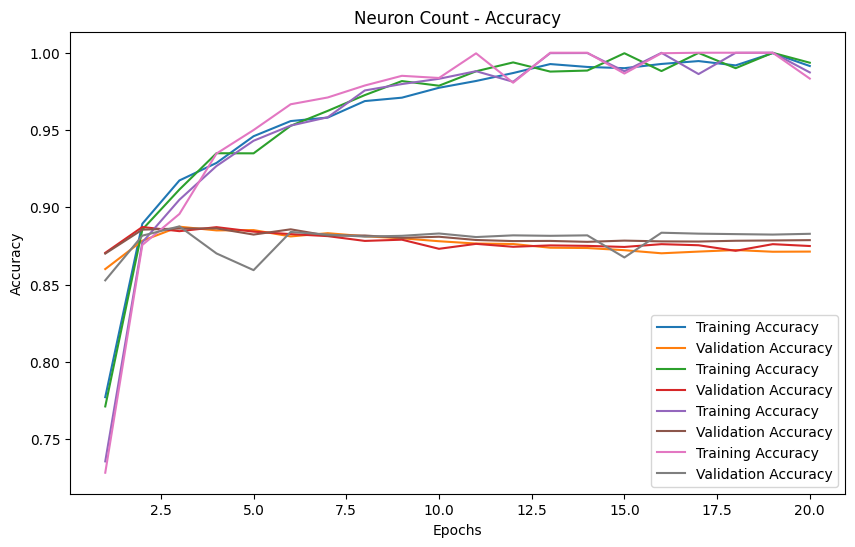

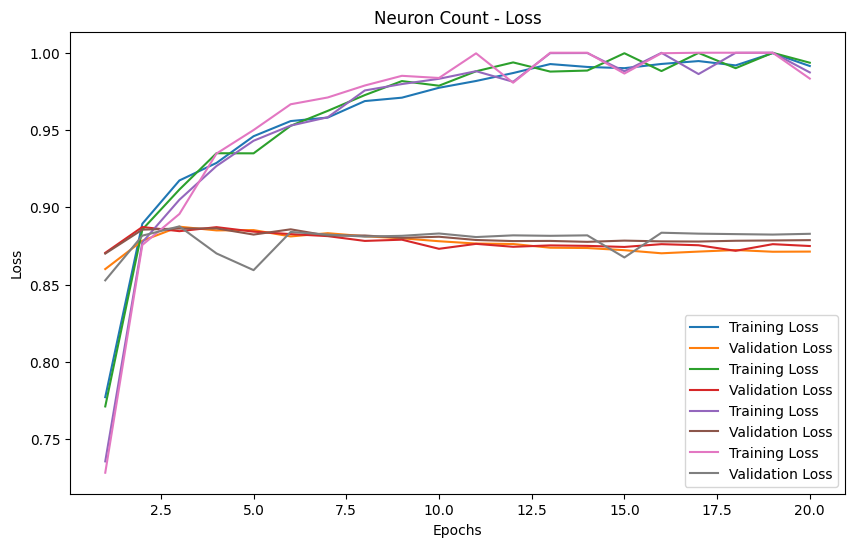

In [ ]:
# Experiment 2: Evaluating the effect of changing the number of neurons per hidden layer
print("\n--- Experiment 2: Varying Neuron Count ---")
neuron_variants = [32, 64, 128, 256]
history_by_neuron_size = {}

for neuron_count in neuron_variants:
    print(f"Training model with {neuron_count} neurons per layer...")
    neuron_model = build_neural_model(num_hidden_layers=2, units_per_layer=neuron_count)
    neuron_training_log = neuron_model.fit(partial_train_inputs, partial_train_outputs,
                                           epochs=20,
                                           batch_size=512,
                                           validation_data=(validation_inputs, validation_outputs),
                                           verbose=1)
    history_by_neuron_size[neuron_count] = neuron_training_log
    validation_accuracy = neuron_training_log.history['val_accuracy'][-1]
    test_accuracy = neuron_model.evaluate(test_vectors, test_targets, verbose=0)[1]
    evaluation_summary['Neuron Count'][neuron_count] = {
        'Validation Accuracy': validation_accuracy,
        'Test Accuracy': test_accuracy
    }

plot_metrics(history_by_neuron_size, 'Neuron Count - Accuracy', 'Accuracy')
plot_metrics(history_by_neuron_size, 'Neuron Count - Loss', 'Loss')



--- Experiment 3: Loss Function Comparison ---
Training model with MSE loss function...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.6700 - auc: 0.7590 - loss: 0.2204 - precision: 0.7406 - recall: 0.5071 - val_accuracy: 0.8519 - val_auc: 0.9288 - val_loss: 0.1416 - val_precision: 0.8802 - val_recall: 0.8183
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8801 - auc: 0.9431 - loss: 0.1232 - precision: 0.8841 - recall: 0.8734 - val_accuracy: 0.8740 - val_auc: 0.9461 - val_loss: 0.1072 - val_precision: 0.8978 - val_recall: 0.8470
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9110 - auc: 0.9647 - loss: 0.0872 - precision: 0.9104 - recall: 0.9108 - val_accuracy: 0.8807 - val_auc: 0.9497 - val_loss: 0.0940 - val_precision: 0.8527 - val_recall: 0.9234
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9196 - auc: 0.9714 - loss: 0.0717 - precision: 0.9178 - recall: 0.9208 - val_accuracy: 0.8786 - val_auc: 0.9520 - val_loss:

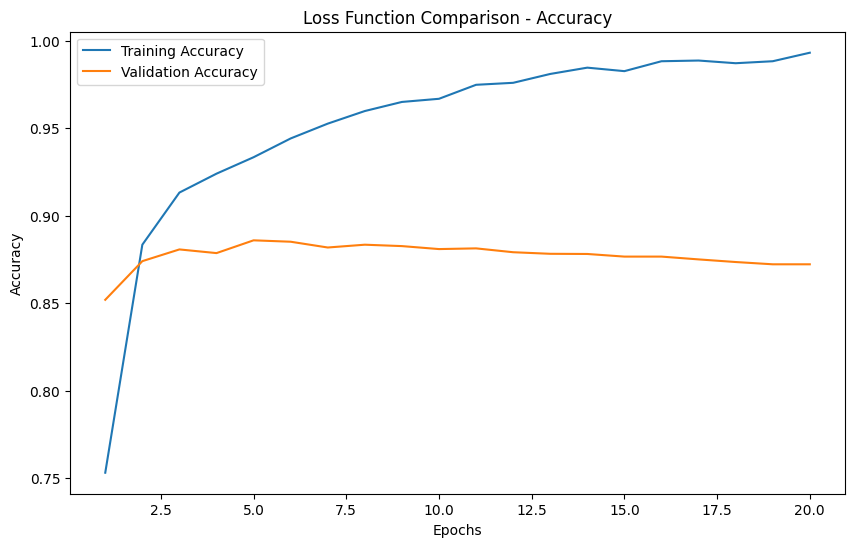

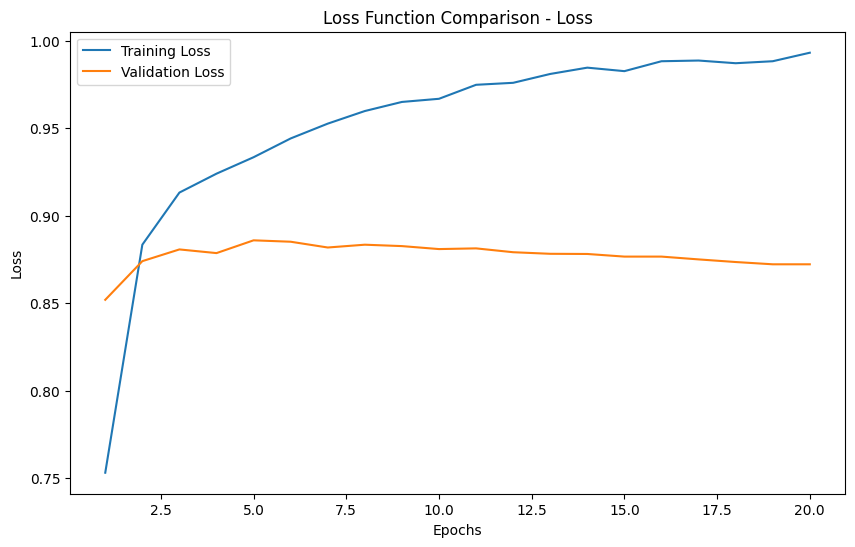

In [ ]:
# Experiment 3: Comparing the model performance across different loss functions
print("\n--- Experiment 3: Loss Function Comparison ---")
loss_history_logs = {}

print("Training model with MSE loss function...")
mse_based_model = build_neural_model(loss_type='mse')
mse_training_record = mse_based_model.fit(partial_train_inputs, partial_train_outputs,
                                          epochs=20,
                                          batch_size=512,
                                          validation_data=(validation_inputs, validation_outputs),
                                          verbose=1)
loss_history_logs['MSE'] = mse_training_record
mse_val_accuracy = mse_training_record.history['val_accuracy'][-1]
mse_test_accuracy = mse_based_model.evaluate(test_vectors, test_targets, verbose=0)[1]
evaluation_summary['Neuron Count'][neuron_count] = {
    'Validation Accuracy': mse_val_accuracy,
    'Test Accuracy': mse_test_accuracy
}

plot_metrics(loss_history_logs, 'Loss Function Comparison - Accuracy', 'Accuracy')
plot_metrics(loss_history_logs, 'Loss Function Comparison - Loss', 'Loss')



--- Experiment 4: Activation Function Comparison ---
Training model with tanh activation function...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7133 - auc: 0.7933 - loss: 0.5752 - precision: 0.7143 - recall: 0.7056 - val_accuracy: 0.8672 - val_auc: 0.9390 - val_loss: 0.3840 - val_precision: 0.8756 - val_recall: 0.8593
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8980 - auc: 0.9596 - loss: 0.3253 - precision: 0.8960 - recall: 0.8992 - val_accuracy: 0.8831 - val_auc: 0.9515 - val_loss: 0.3072 - val_precision: 0.9048 - val_recall: 0.8591
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9239 - auc: 0.9750 - loss: 0.2355 - precision: 0.9227 - recall: 0.9244 - val_accuracy: 0.8870 - val_auc: 0.9542 - val_loss: 0.2770 - val_precision: 0.8908 - val_recall: 0.8848
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9368 - auc: 0.9826 - loss: 0.1837 - precision: 0.9371 - recall: 0.9357 - val_accuracy: 0.8866 - val_auc: 0.954

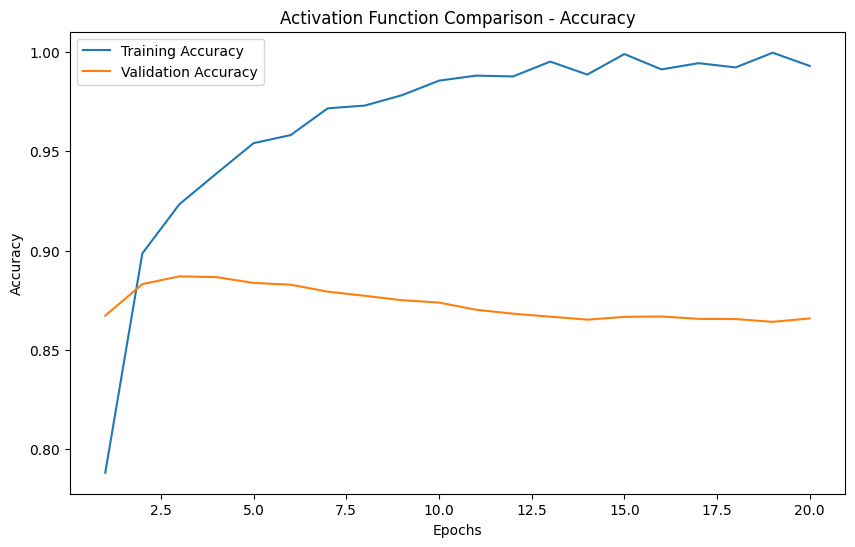

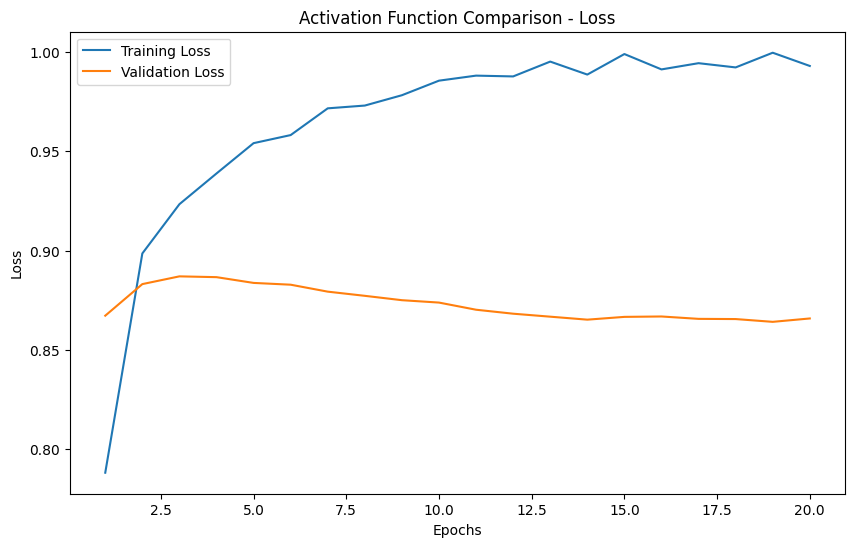

In [ ]:
# Experiment 4: Evaluating the effect of different activation functions
print("\n--- Experiment 4: Activation Function Comparison ---")
activation_history_log = {}

print("Training model with tanh activation function...")
tanh_based_model = build_neural_model(activation_type='tanh')
tanh_training_result = tanh_based_model.fit(partial_train_inputs, partial_train_outputs,
                                            epochs=20,
                                            batch_size=512,
                                            validation_data=(validation_inputs, validation_outputs),
                                            verbose=1)
activation_history_log['tanh'] = tanh_training_result
tanh_val_accuracy = tanh_training_result.history['val_accuracy'][-1]
tanh_test_accuracy = tanh_based_model.evaluate(test_vectors, test_targets, verbose=0)[1]
evaluation_summary['Neuron Count'][neuron_count] = {
    'Validation Accuracy': tanh_val_accuracy,
    'Test Accuracy': tanh_test_accuracy
}

plot_metrics(activation_history_log, 'Activation Function Comparison - Accuracy', 'Accuracy')
plot_metrics(activation_history_log, 'Activation Function Comparison - Loss', 'Loss')



--- Experiment 5: Dropout Regularization ---
Training model with dropout rate 0.3...
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.6591 - auc: 0.7271 - loss: 0.6289 - precision: 0.6715 - recall: 0.6108 - val_accuracy: 0.8603 - val_auc: 0.9331 - val_loss: 0.4425 - val_precision: 0.8816 - val_recall: 0.8357
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8556 - auc: 0.9256 - loss: 0.4164 - precision: 0.8524 - recall: 0.8583 - val_accuracy: 0.8801 - val_auc: 0.9473 - val_loss: 0.3448 - val_precision: 0.8814 - val_recall: 0.8813
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.8909 - auc: 0.9547 - loss: 0.3164 - precision: 0.8857 - recall: 0.8963 - val_accuracy: 0.8860 - val_auc: 0.9519 - val_loss: 0.3014 - val_precision: 0.8939 - val_recall: 0.8787
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9105 - auc: 0.9673 - loss: 0.2609 - precision: 0.9054 - recall: 0.9157 - val_accuracy: 0.8853 - val_auc: 0.9528 - val_loss: 0.

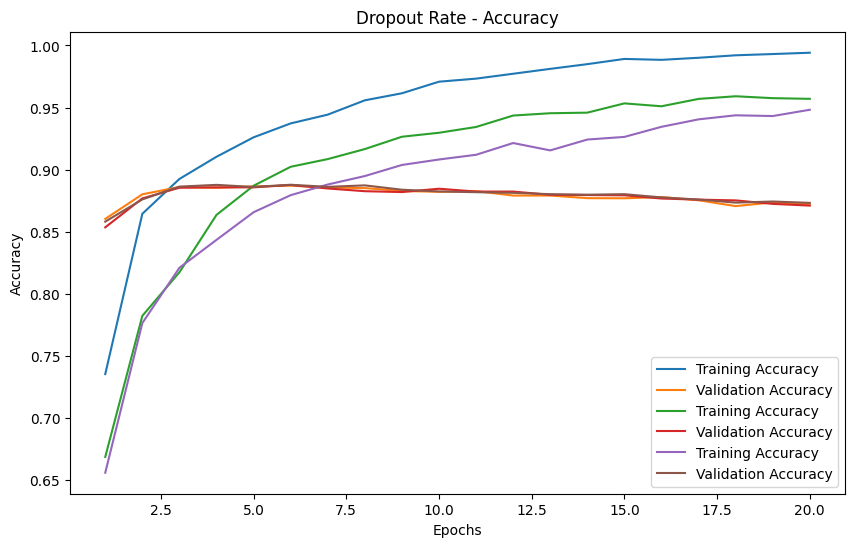

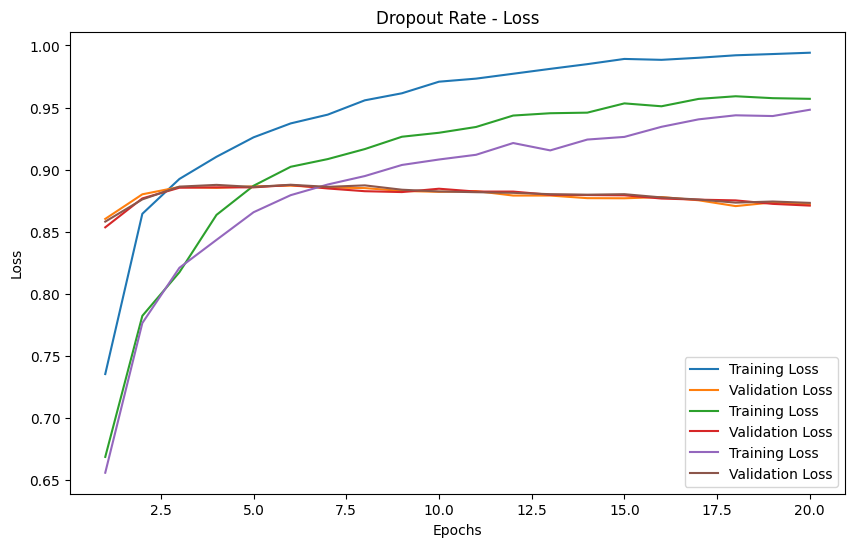

In [ ]:
# Experiment 5: Investigating the effect of dropout as a regularization technique
print("\n--- Experiment 5: Dropout Regularization ---")
dropout_variants = [0.3, 0.5, 0.7]
dropout_history_logs = {}

for dropout_value in dropout_variants:
    print(f"Training model with dropout rate {dropout_value}...")
    dropout_model = build_neural_model(dropout_rate=dropout_value)
    dropout_training_history = dropout_model.fit(partial_train_inputs, partial_train_outputs,
                                                 epochs=20,
                                                 batch_size=512,
                                                 validation_data=(validation_inputs, validation_outputs),
                                                 verbose=1)
    dropout_history_logs[dropout_value] = dropout_training_history

final_dropout_val_acc = dropout_training_history.history['val_accuracy'][-1]
final_dropout_test_acc = dropout_model.evaluate(test_vectors, test_targets, verbose=0)[1]
evaluation_summary['Neuron Count'][neuron_count] = {
    'Validation Accuracy': final_dropout_val_acc,
    'Test Accuracy': final_dropout_test_acc
}

plot_metrics(dropout_history_logs, 'Dropout Rate - Accuracy', 'Accuracy')
plot_metrics(dropout_history_logs, 'Dropout Rate - Loss', 'Loss')


In [ ]:
# Printing the final results of the test data
print("\n--- Final Evaluation on Test Data ---")
final_metrics = dropout_model.evaluate(test_vectors, test_targets, verbose=0)  # Evaluate model on test data
print(f"Test Loss: {final_metrics[0]:.4f}, Test Accuracy: {final_metrics[1]:.4f}")



--- Final Evaluation on Test Data ---
Test Loss: 0.5992, Test Accuracy: 0.8630
